# Generate a Network of Co-Occurrences in Book 4

# 4.2.1 Associate the Sentence ID to each Attestation

In [1]:
import pandas as pd
import networkx as nx
import itertools
import matplotlib.pyplot as plt
import operator

In [2]:
## open the file containing the division in sentences of Book 4 (510 rows)
Sentences_Book4 = pd.read_csv("/Users/u0154817/OneDrive - KU Leuven/Documents/KU Leuven/PhD project 'Greek Spaces in Roman Times'/Data_Extraction/Outputs/4.1.Split_Sentences_Book_4.csv", delimiter=",")

In [3]:
len(Sentences_Book4)

510

In [4]:
## open the file containing the enriched ToposText annotations (2,508 rows)
Enriched_ToposText_Book4 = pd.read_csv("/Users/u0154817/OneDrive - KU Leuven/Documents/KU Leuven/PhD project 'Greek Spaces in Roman Times'/Data_Extraction/Outputs/1.8.Enriched_ToposText_Book4.csv", delimiter=",")

In [5]:
len(Enriched_ToposText_Book4)

2508

In [6]:
Sentence_ID = []

for i1,Reference1 in enumerate(Enriched_ToposText_Book4['Reference']): ## for each place name
    for i2,Reference2 in enumerate(Sentences_Book4['Reference']): ## for each sentence
        
        if Reference1 == Reference2: ## if the two entries have the same reference 
            ## if the start position of the place name is in the range of the sentence
            if Enriched_ToposText_Book4['Start position'][i1] in range(Sentences_Book4['Start position'][i2], Sentences_Book4['End position'][i2]):
                Sentence_ID. append(Sentences_Book4['ID'][i2]) ## associate the place name to the sentence ID
                break

In [7]:
len(Sentence_ID)

2508

In [8]:
Enriched_ToposText_Book4['Sentence ID']=Sentence_ID

# 4.2.2 Generate a Network

In [9]:
Entities_copy = []
for i,Entity in enumerate(Enriched_ToposText_Book4['Tagged Entity']):
    temp_list = []
    temp_list.append(Entity)
    Entities_copy.append(temp_list)

Enriched_ToposText_Book4['Tagged Entity_Copy']=Entities_copy

In [10]:
Entities = Enriched_ToposText_Book4['Tagged Entity_Copy']

In [11]:
groups = Entities.groupby(Enriched_ToposText_Book4['Sentence ID'])
Entities = groups.sum()

In [12]:
Entities

Sentence ID
urn:cts:latinLit:phi0978.phi001:4.1.1.0                   [Europe, Acroceraunia, Hellespont]
urn:cts:latinLit:phi0978.phi001:4.1.1.1    [Epirus, Acarnania, Aitolia, Phocis, Locris, A...
urn:cts:latinLit:phi0978.phi001:4.1.1.2                                             [Greece]
urn:cts:latinLit:phi0978.phi001:4.1.2.0                               [Epirus, Acroceraunia]
urn:cts:latinLit:phi0978.phi001:4.1.2.1          [Chaones, Chaonia, Thesproti, Antigonenses]
                                                                 ...                        
urn:cts:latinLit:phi0978.phi001:4.9.2.2                        [Schoenites, Saronic, Greece]
urn:cts:latinLit:phi0978.phi001:4.9.2.3    [Epidaurus, Aesculapius, Spiraion, Anthedus, B...
urn:cts:latinLit:phi0978.phi001:4.9.2.4                                       [Peloponnesus]
urn:cts:latinLit:phi0978.phi001:4.9.2.5          [Ionian, Sicilian, Cretan, Aegean, Myrtoan]
urn:cts:latinLit:phi0978.phi001:4.9.2.6                   

In [13]:
list_of_pairs = []

for list_of_entities in Entities:
    for pair in itertools.combinations(list_of_entities,2):
        list_of_pairs.append(pair)

In [14]:
G=nx.Graph()

In [15]:
V={}
E={}

In [16]:
G.add_nodes_from(V)
G.add_edges_from(E)

In [17]:
for entity_tuple in list_of_pairs:
    
    if G.has_edge(entity_tuple[0], entity_tuple[1]):
        G[entity_tuple[0]][entity_tuple[1]]['weight']=+1
        
    else: G.add_edge(entity_tuple[0], entity_tuple[1], weight=1)

In [18]:
print(f"N nodes = {G.number_of_nodes()}")

N nodes = 1675


In [19]:
print(f"N edges = {G.number_of_edges()}")

N edges = 10755


In [20]:
# Define the ego node (central node)
ego_node = 'Naxos'

# Create the ego network
ego_network = nx.ego_graph(G, ego_node)

In [21]:
# Print the nodes in the ego network
print("Nodes in the ego network:")
print(ego_network.nodes())

# Print the edges in the ego network
print("Edges in the ego network:")
print(ego_network.edges())

Nodes in the ego network:
['Callipolis', 'Phoenice', 'Pholegandros', 'Doliche', 'Schinussa', 'Odia', 'Naxos', 'Helene', 'Scyros', 'Delos', 'Dionysias', 'Lesser Sicily', 'Macris', 'Dia', 'Oletandros', 'Nicasia', 'Icaros', 'Ichthyoessa', 'Homer', 'Gyara', 'Phacussa', 'Strongyle', 'Ios', 'Andros']
Edges in the ego network:
[('Callipolis', 'Naxos'), ('Callipolis', 'Strongyle'), ('Callipolis', 'Dia'), ('Callipolis', 'Dionysias'), ('Callipolis', 'Lesser Sicily'), ('Phoenice', 'Scyros'), ('Phoenice', 'Ios'), ('Phoenice', 'Naxos'), ('Phoenice', 'Homer'), ('Phoenice', 'Odia'), ('Phoenice', 'Oletandros'), ('Phoenice', 'Gyara'), ('Phoenice', 'Andros'), ('Pholegandros', 'Helene'), ('Pholegandros', 'Phacussa'), ('Pholegandros', 'Nicasia'), ('Pholegandros', 'Schinussa'), ('Pholegandros', 'Naxos'), ('Pholegandros', 'Icaros'), ('Pholegandros', 'Doliche'), ('Pholegandros', 'Macris'), ('Pholegandros', 'Ichthyoessa'), ('Doliche', 'Helene'), ('Doliche', 'Phacussa'), ('Doliche', 'Nicasia'), ('Doliche', 'Sc

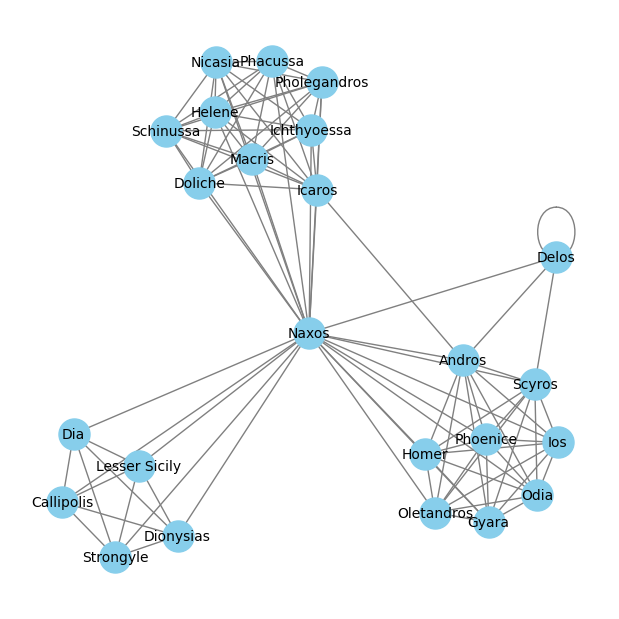

In [22]:
# Plot the ego network
plt.figure(figsize=(6, 6))
pos = nx.spring_layout(ego_network)  # Position nodes using a spring layout algorithm
nx.draw(ego_network, pos, with_labels=True, node_color='skyblue', node_size=500, edge_color='gray', width=1.0, font_size=10)
plt.savefig('ego_network_plot.png')
plt.show()